In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
traindata = pd.read_csv('train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print(traindata.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [10]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
trainint = traindata.select_dtypes(include=['int64'])

In [15]:
trainint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [19]:
trainint.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [21]:
numeric_data = trainint.drop(columns=["MSSubClass","OverallQual","OverallCond","Id"])

In [22]:
numeric_data.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,8450,2003,2003,706,0,150,856,856,854,0,...,0,61,0,0,0,0,0,2,2008,208500
1,9600,1976,1976,978,0,284,1262,1262,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,11250,2001,2002,486,0,434,920,920,866,0,...,0,42,0,0,0,0,0,9,2008,223500
3,9550,1915,1970,216,0,540,756,961,756,0,...,0,35,272,0,0,0,0,2,2006,140000
4,14260,2000,2000,655,0,490,1145,1145,1053,0,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LotArea        1460 non-null   int64
 1   YearBuilt      1460 non-null   int64
 2   YearRemodAdd   1460 non-null   int64
 3   BsmtFinSF1     1460 non-null   int64
 4   BsmtFinSF2     1460 non-null   int64
 5   BsmtUnfSF      1460 non-null   int64
 6   TotalBsmtSF    1460 non-null   int64
 7   1stFlrSF       1460 non-null   int64
 8   2ndFlrSF       1460 non-null   int64
 9   LowQualFinSF   1460 non-null   int64
 10  GrLivArea      1460 non-null   int64
 11  BsmtFullBath   1460 non-null   int64
 12  BsmtHalfBath   1460 non-null   int64
 13  FullBath       1460 non-null   int64
 14  HalfBath       1460 non-null   int64
 15  BedroomAbvGr   1460 non-null   int64
 16  KitchenAbvGr   1460 non-null   int64
 17  TotRmsAbvGrd   1460 non-null   int64
 18  Fireplaces     1460 non-null   int64
 19  Garage

In [26]:
numsale = numeric_data["SalePrice"]

In [27]:
numsale.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

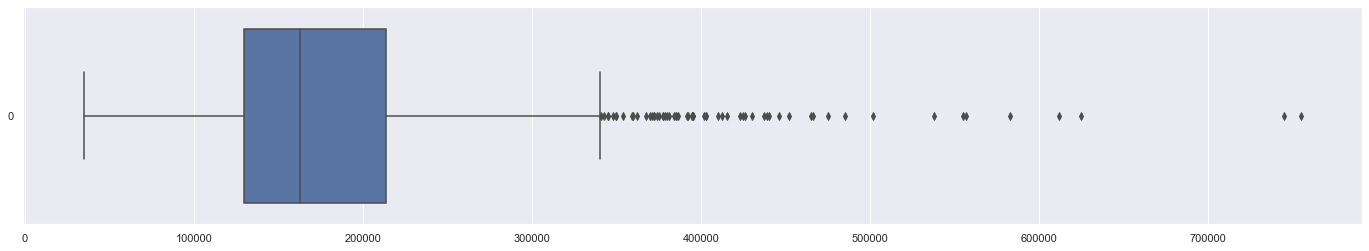

In [41]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = numsale, orient = "h")

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

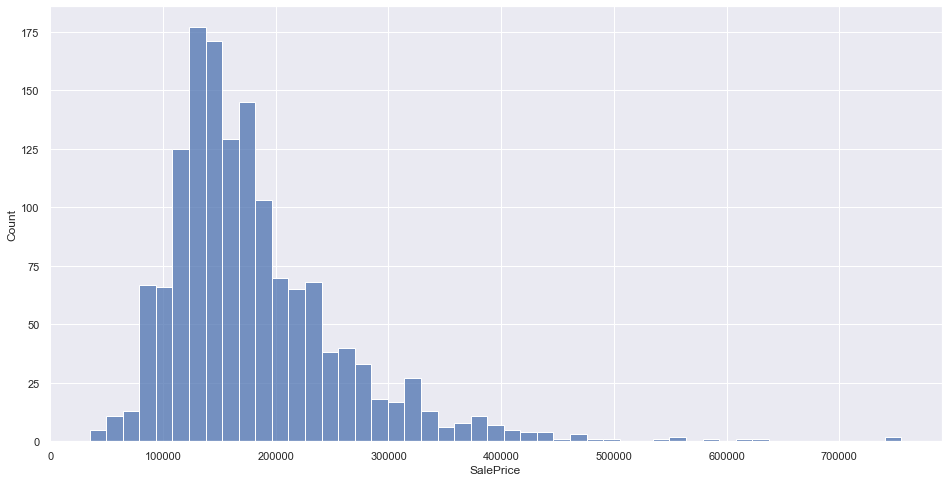

In [29]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = numsale)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

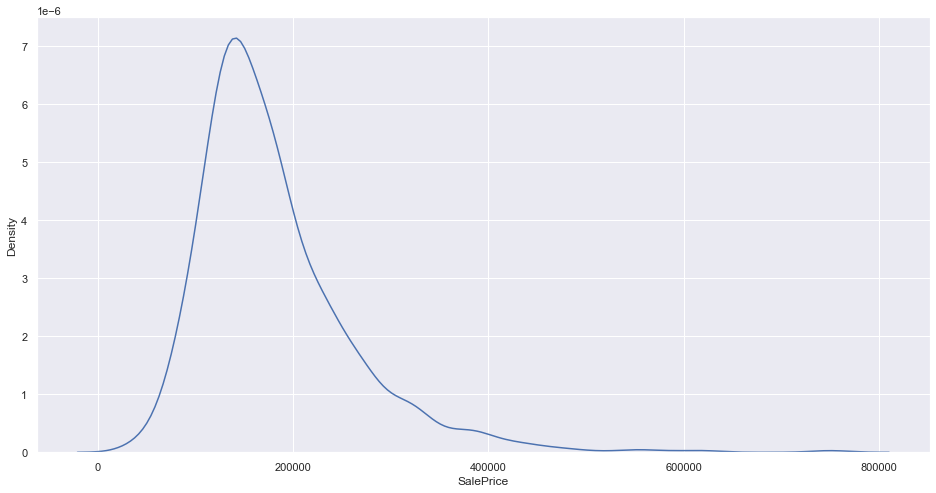

In [30]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = numsale)

In [54]:
numlot = numeric_data['LotArea']

NameError: name 'LotArea' is not defined

<AxesSubplot:>

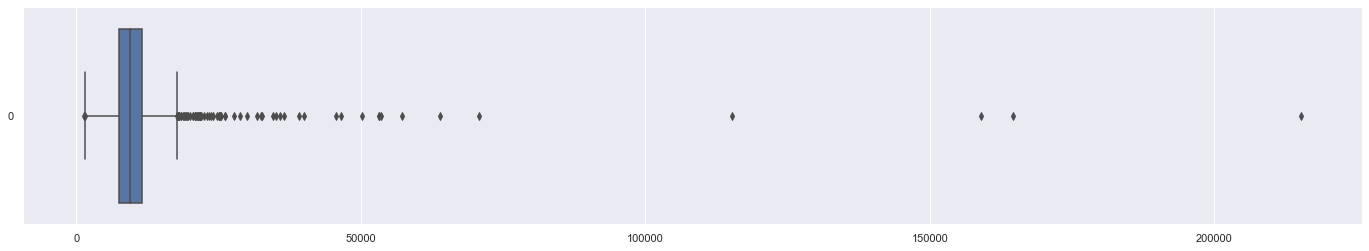

In [53]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = numlot, orient = "h")

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

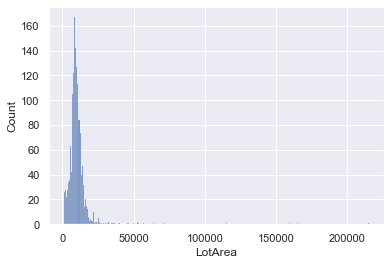

In [47]:
#f = plt.figure(figsize=(16, 8))
sb.histplot(data = numlot)

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

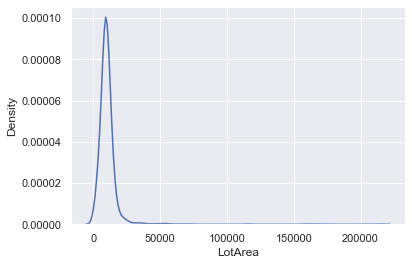

In [44]:
#f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = numlot)

In [56]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([numsale, numlot], axis = 1).reindex(numsale.index)
jointDF

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


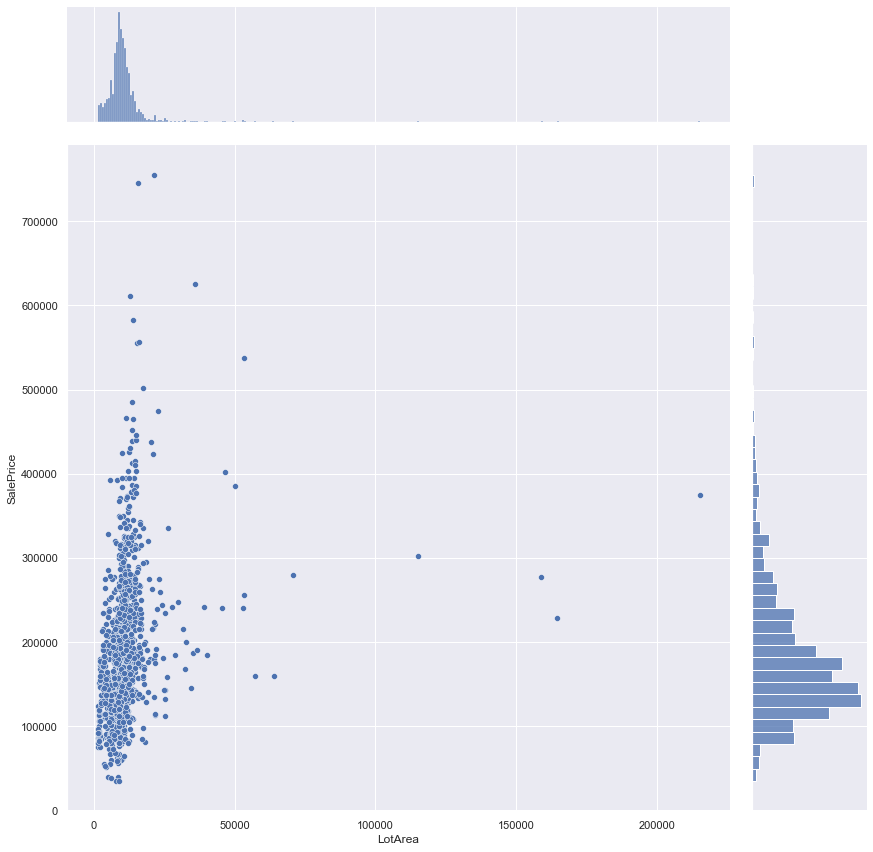

In [61]:
sb.jointplot(data = jointDF, x = numlot, y = numsale, height = 12)

In [62]:
jointDF.corr()

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000
